<a href="https://colab.research.google.com/github/vfunnny2000/PythonAnalytics/blob/master/PythonAnalytics_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. 
Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv

In [7]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data_4.csv to kc_house_data_4.csv


In [8]:
df = pd.read_csv('kc_house_data_4.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2
 Изучите стоимости недвижимости

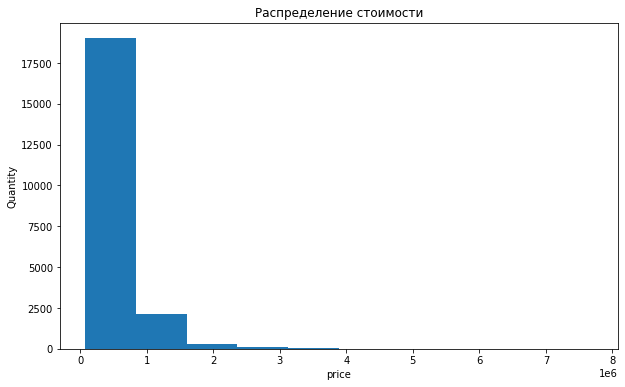

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'])
plt.title('Распределение стоимости')
plt.xlabel('price')
plt.ylabel('Quantity');

### 1.3 
Изучите распределение квадратуры жилой

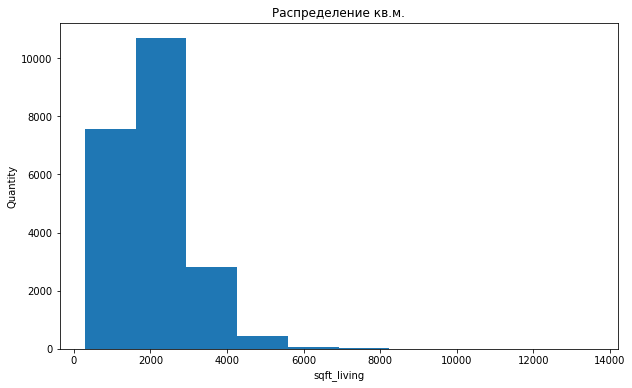

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(df['sqft_living'])
plt.title('Распределение кв.м.')
plt.xlabel('sqft_living')
plt.ylabel('Quantity');

### 1.4 
Изучите распределение года постройки

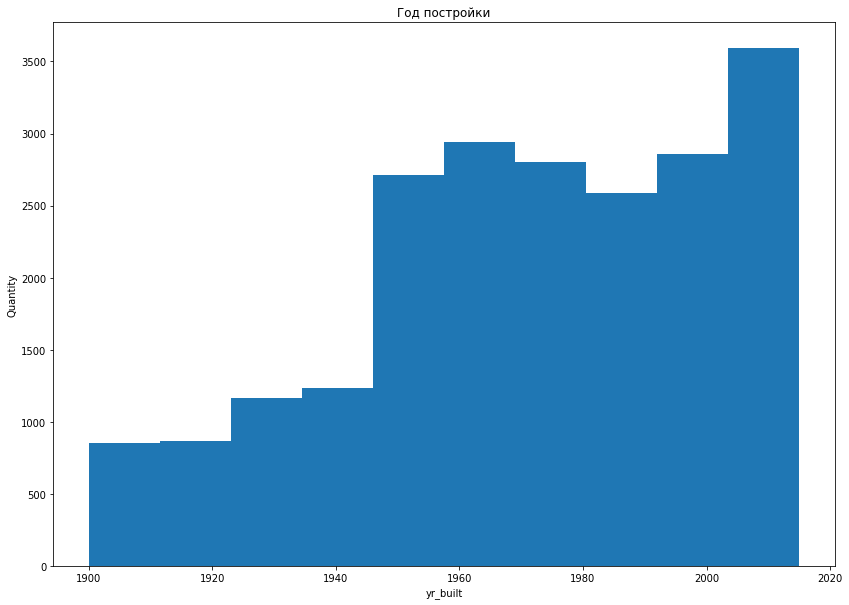

In [66]:
plt.figure(figsize=(14, 10))
plt.hist(df['yr_built'])
plt.title('Год постройки')
plt.xlabel('yr_built')
plt.ylabel('Quantity');

## Задача 2

### 2.1 
Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

In [16]:
data = df['waterfront'].value_counts()
names = data.index
values = data.values

data

0    21450
1      163
Name: waterfront, dtype: int64

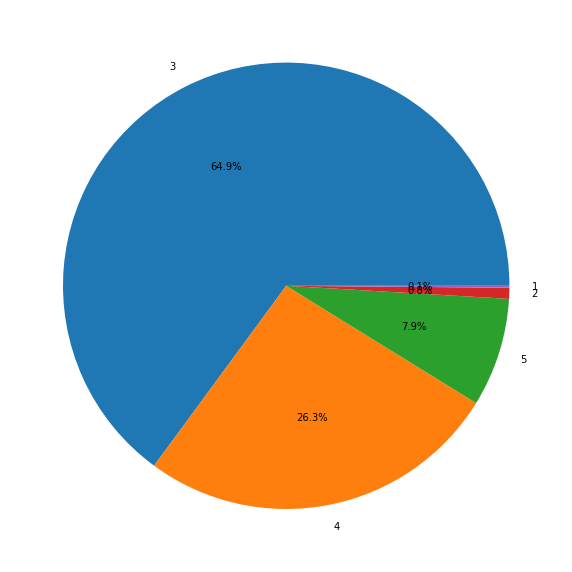

In [69]:
plt.figure(figsize=(10, 12))
plt.pie(values, autopct='%1.1f%%', labels=names);

### 2.2
 Изучите распределение этажей домов

In [18]:
data = df['floors'].value_counts()
names = data.index
values = data.values
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

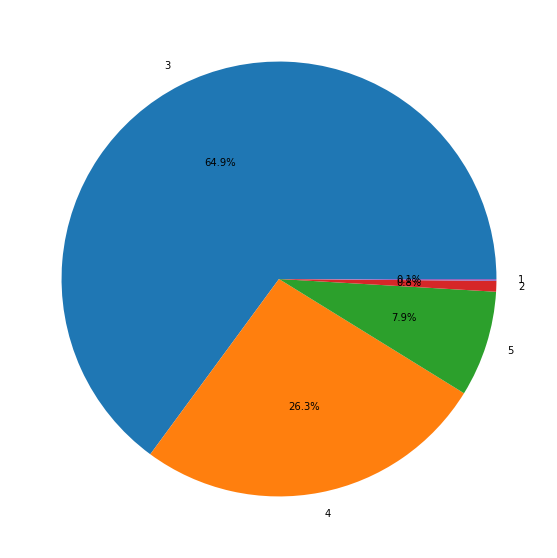

In [70]:
plt.figure(figsize=(12, 10))
plt.pie(values, autopct='%.1f%%', labels=names);

### 2.3 
Изучите распределение состояния домов

In [20]:
data = df['condition'].value_counts()
names = data.index
values = data.values
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

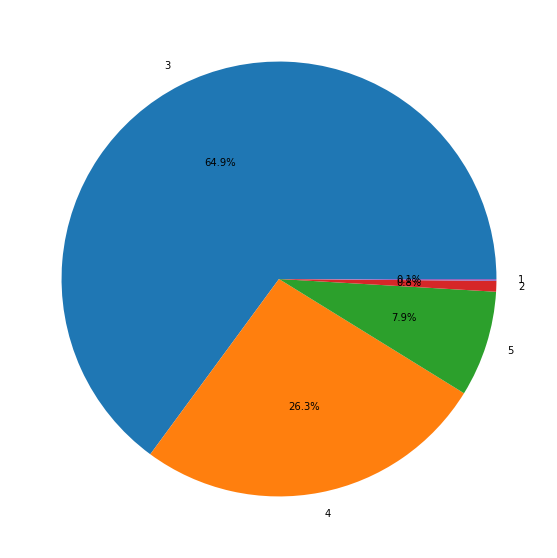

In [71]:
plt.figure(figsize=(12, 10))
plt.pie(values, autopct='%1.1f%%', labels=names);

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [63]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


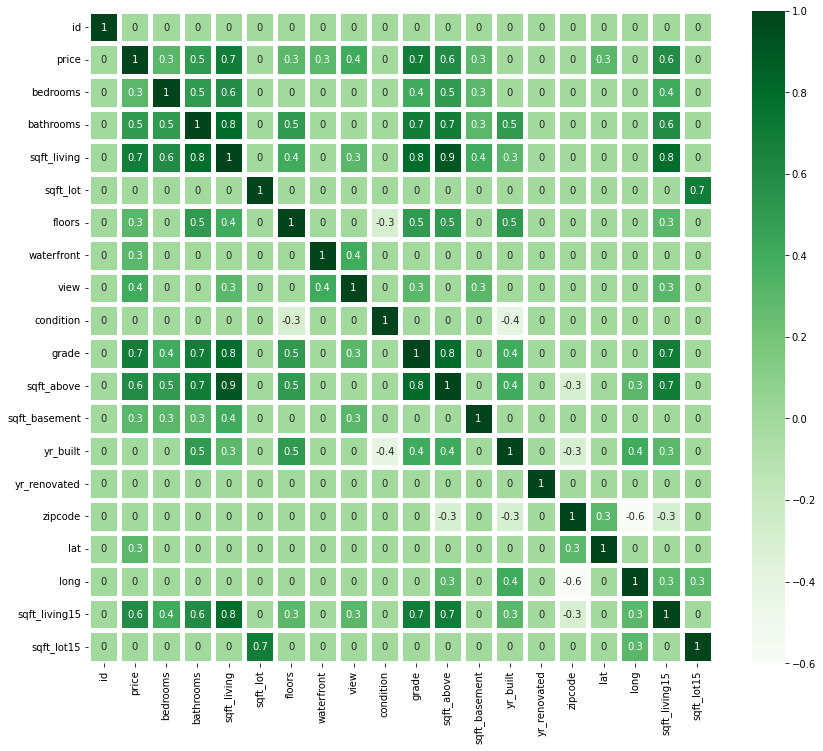

In [50]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=5, cmap='Greens');

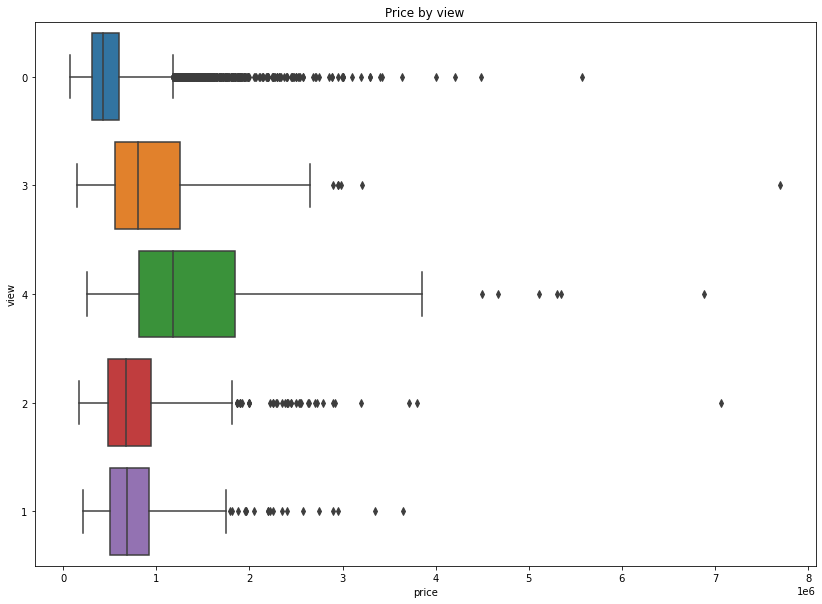

In [25]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=2)
plt.title('Price by view')
plt.xlabel('price')
plt.ylabel('view');


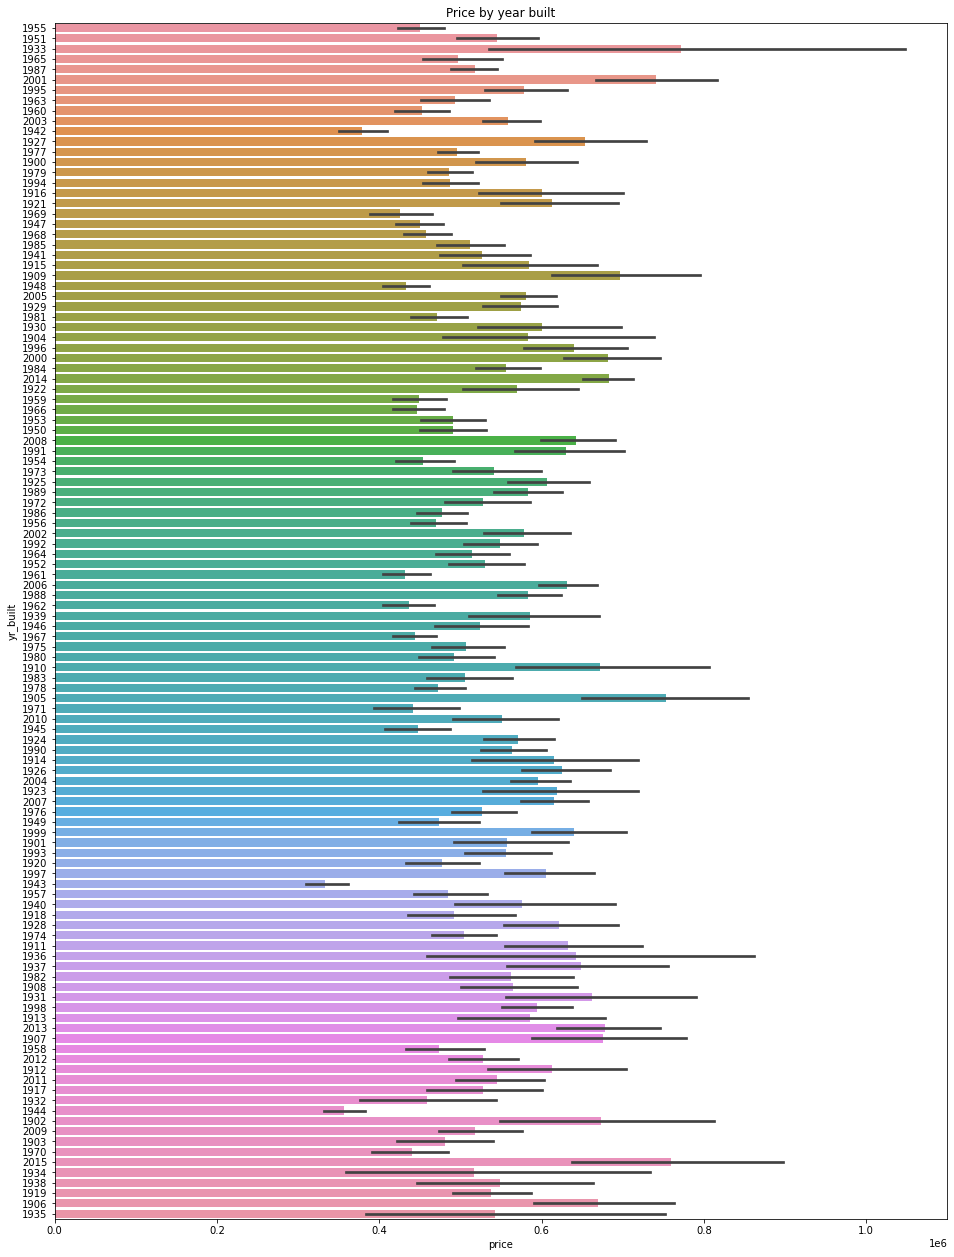

In [35]:
plt.figure(figsize=(16, 22))
sns.barplot(x=df['price'], y=df['yr_built'].astype('str'), hue=None)
plt.title('Price by year built')
plt.xlabel('price')
plt.ylabel('yr_built');

In [42]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('price', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


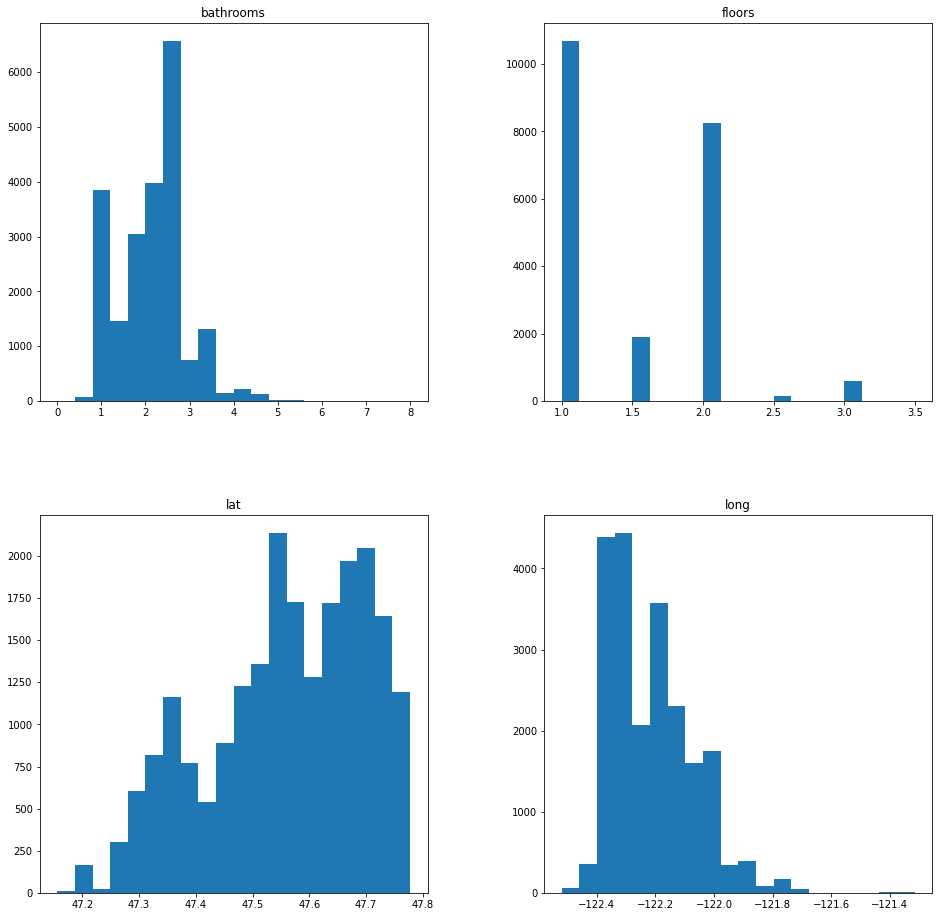

In [43]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

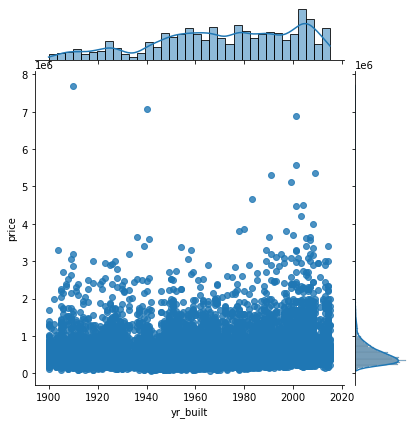

In [47]:
sns.jointplot(x=df['yr_built'], y=df['price'], kind='reg');

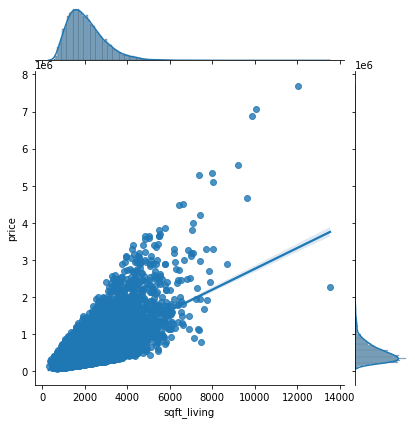

In [52]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

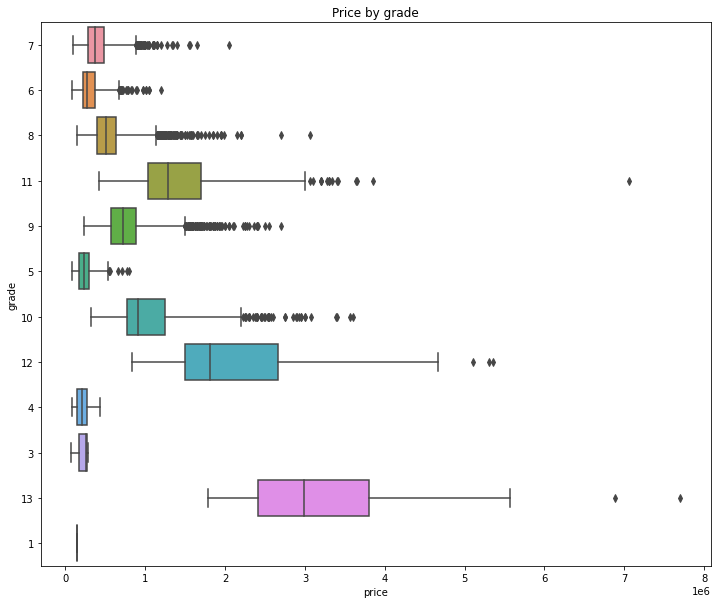

In [60]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=2);

plt.title('Price by grade')
plt.xlabel('price')
plt.ylabel('grade');
